> `cf.`
>
> + [AIは学習後が超大事！ゼロからわかる機械学習モデルの性能評価Part1](https://aizine.ai/confusion-matrix0225/)
> + [sklearnのpipelineの中身を理解する - Qiita](https://qiita.com/shota-imazeki/items/4a69e4ef2f12e0313495)

In [25]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# algorithm
from sklearn.svm import SVC# サポートベクトルマシン
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier #K近傍方
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.ensemble import GradientBoostingClassifier #勾配ブースティング
from sklearn.neural_network import MLPClassifier

# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
# 乳癌診断データ
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# データを目的変数と説明変数に分割
X = dataset.loc[:, 2:].values #２列目以降
y = dataset.loc[:, 1].values #1列目

In [7]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object

In [14]:
y.value_counts()

B    357
M    212
Name: 1, dtype: int64

In [20]:
# カテゴリカル変数を連続値にする
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [22]:
# 訓練データをテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
# パイプラインを用いてデータのスケール変換と機械学習アルゴリズムによるモデル構築準備
pipe_svc = Pipeline([("scl", StandardScaler()), ("clf", SVC(random_state=1))])
pipe_knn = Pipeline([("scl", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=10))])
pipe_logistic = Pipeline([("scl", StandardScaler()), ("clf", LogisticRegression())])
pipe_rf = Pipeline([("scl", StandardScaler()), ("clf", RandomForestClassifier(random_state=1))])
pipe_gb = Pipeline([("scl", StandardScaler()), ("clf", GradientBoostingClassifier(random_state=1))])
pipe_mlp = Pipeline([("scl", StandardScaler()), ("clf", MLPClassifier(hidden_layer_sizes=(5,2), max_iter=500, random_state=1))])

pipe_names = ["SVC", "KNeighbors", "LogisticRegression", "RandomForest", "GradientBoosting", "MLP"]
pipe_lines = [pipe_svc, pipe_knn, pipe_logistic, pipe_rf, pipe_gb, pipe_mlp]

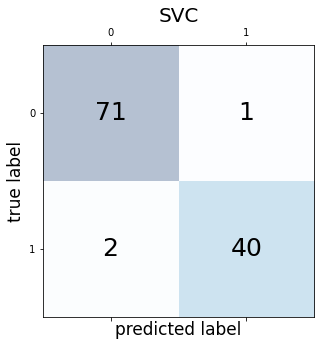

SVC accuracy : 0.974

              precision    recall  f1-score   support

          良性       0.97      0.99      0.98        72
          悪性       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

________________________________________



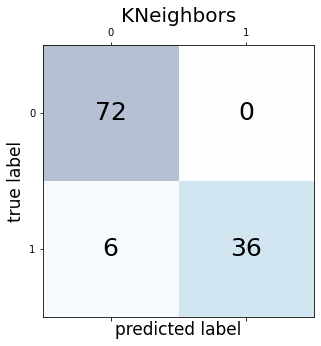

KNeighbors accuracy : 0.947

              precision    recall  f1-score   support

          良性       0.92      1.00      0.96        72
          悪性       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

________________________________________



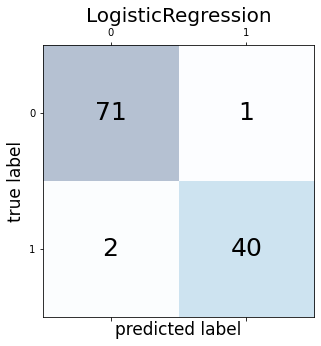

LogisticRegression accuracy : 0.974

              precision    recall  f1-score   support

          良性       0.97      0.99      0.98        72
          悪性       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

________________________________________



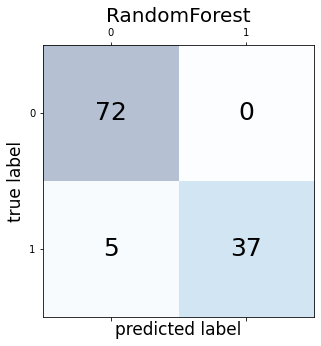

RandomForest accuracy : 0.956

              precision    recall  f1-score   support

          良性       0.94      1.00      0.97        72
          悪性       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

________________________________________



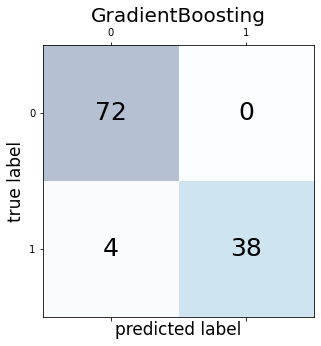

GradientBoosting accuracy : 0.965

              precision    recall  f1-score   support

          良性       0.95      1.00      0.97        72
          悪性       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

________________________________________



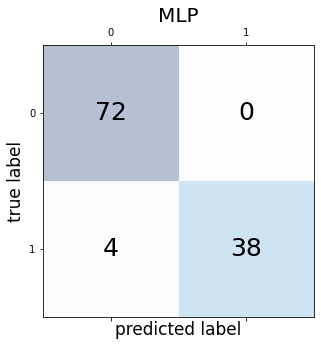

MLP accuracy : 0.965

              precision    recall  f1-score   support

          良性       0.95      1.00      0.97        72
          悪性       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

________________________________________



In [38]:
#（繰返し処理）機械学習アルゴリズム別に混同行列、正解率、適合率、再現率、F値を出力
for (i, pipe) in enumerate(pipe_lines):
    # モデル学習
    pipe.fit(X_train, y_train)
    # モデル予測( 悪性腫瘍 or 良性腫瘍 )
    y_pred = pipe.predict(X_test)
    
    # 混同行列（実際のクラス、予測で得たクラスを比較）
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    # 混同行列からヒートマップ描画
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for j in range(confmat.shape[0]):
        for k in range(confmat.shape[1]):
            ax.text(x=k, y=j, s=confmat[j, k], va="center", ha="center", fontsize=25)
    plt.title(pipe_names[ i ], fontsize=20)
    plt.xlabel("predicted label", fontsize=17)
    plt.ylabel("true label", fontsize=17)
    plt.show()
    
    # 機械学習アルゴリズム毎に正解率を出力
    print(f"{pipe_names[ i ]} accuracy : {accuracy_score(y_test, y_pred):.3f}")
    print()
    # 適合率、再現率、F値、サンプルの合計数を出力
    print(classification_report(y_test, y_pred, target_names=["良性", "悪性"]))
    print("_"*40)
    print()